In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [9]:
x_train[0].shape

(32, 32, 3)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

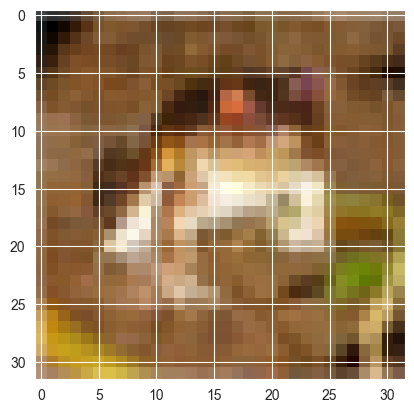

In [10]:
plt.imshow(single_image)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
x_train = x_train / 255

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [17]:
y_example = to_categorical(y_train)

In [18]:
y_example.shape

(50000, 10)

In [19]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [21]:
y_cat_train = to_categorical(y_train, 10)

In [22]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

In [25]:
scaled_image=  x_train[0]

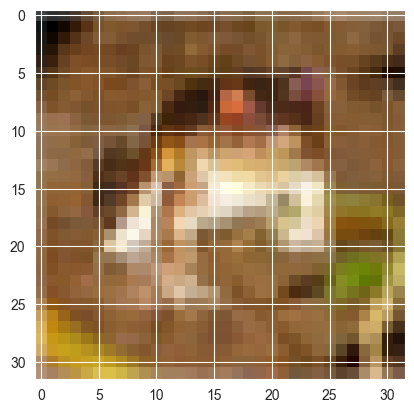

In [26]:
plt.imshow(scaled_image)

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
# x_train = x_train.reshape(60000, 28, 28, 1) #batch size, width, height, color_channels

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Output Layer softmax -> multiclass problem
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# input_shape -> what an image is going to look like
# Dense() where 10 neurons, if binary classification problem then 1 neuron output with sigmoid


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [34]:
model.fit(x_train, y_cat_train, epochs=10, validation_data = (x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0179 - accuracy: 0.6442 - val_loss: 250.2368 - val_accuracy: 0.4656
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9083 - accuracy: 0.6823 - val_loss: 221.4232 - val_accuracy: 0.5019
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8203 - accuracy: 0.7130 - val_loss: 262.2706 - val_accuracy: 0.4754
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7427 - accuracy: 0.7400 - val_loss: 281.0646 - val_accuracy: 0.4970


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.017855,0.64424,250.236755,0.4656
1,0.908280,0.68228,221.423248,0.5019
2,0.820323,0.71304,262.270599,0.4754
3,0.742741,0.74004,281.064575,0.4970


<Axes: >

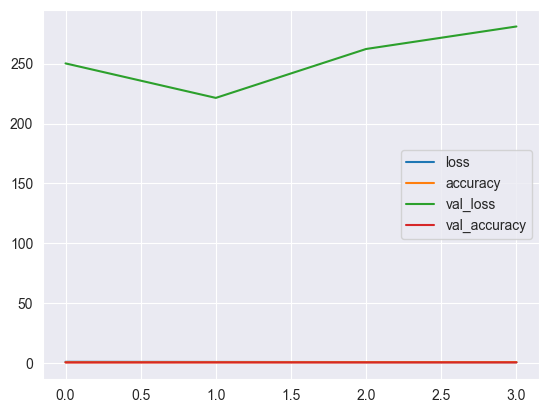

In [37]:
metrics.plot()

<Axes: >

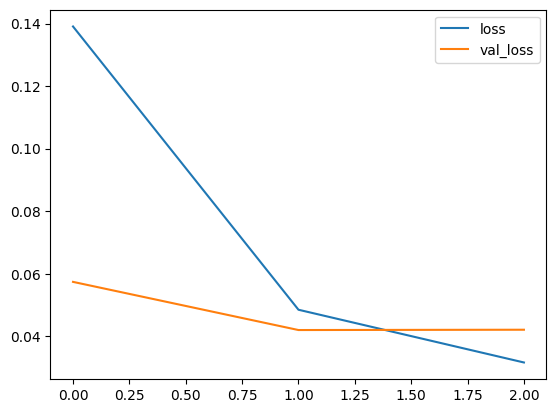

In [34]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

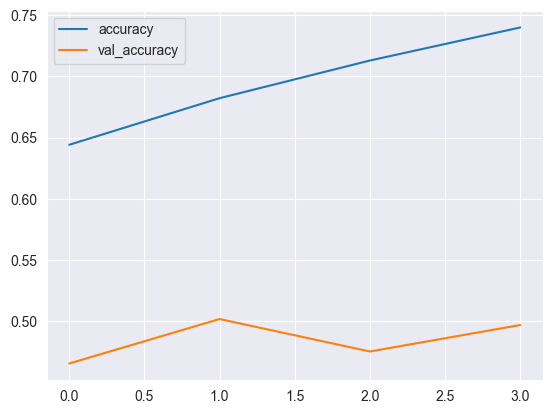

In [50]:
metrics[['accuracy', 'val_accuracy']].plot()

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.evaluate(x_test, y_test, verbose=0)

ValueError: in user code:

    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [43]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.82      0.53      1000
           1       0.44      0.89      0.59      1000
           2       0.71      0.20      0.31      1000
           3       0.43      0.23      0.30      1000
           4       0.80      0.12      0.21      1000
           5       0.41      0.60      0.49      1000
           6       0.85      0.33      0.48      1000
           7       0.66      0.58      0.62      1000
           8       0.57      0.55      0.56      1000
           9       0.52      0.65      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.58      0.50      0.47     10000
weighted avg       0.58      0.50      0.47     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[819,  72,   2,   4,   0,   7,   1,   4,  51,  40],
       [ 29, 885,   0,   1,   0,   7,   0,   1,  24,  53],
       [271,  89, 202,  56,  12, 186,  20,  56,  53,  55],
       [144, 131,  19, 226,   7, 280,  12,  36,  65,  80],
       [198, 134,  29,  77, 121, 158,  19, 115,  76,  73],
       [ 99,  65,   9,  80,   2, 599,   2,  60,  31,  53],
       [ 83, 195,  15,  56,   2, 120, 333,  22,  74, 100],
       [107,  67,   5,  22,   8,  95,   2, 582,  21,  91],
       [257, 125,   1,   3,   0,   6,   1,   1, 552,  54],
       [ 76, 245,   2,   4,   0,   4,   0,   5,  13, 651]], dtype=int64)

In [46]:
import seaborn as sns

<Axes: >

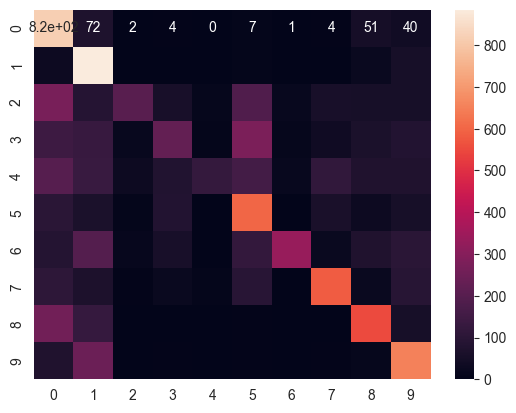

In [47]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [48]:
my_numer = x_test[0]

In [49]:
plt.imshow(my_numer.reshape(28,28))

ValueError: cannot reshape array of size 3072 into shape (28,28)

In [52]:
np.argmax(model.predict(my_numer.reshape(1, 32, 32, 3)), axis=-1)

1/1 [==============================] - 0s 17ms/step


array([5], dtype=int64)

In [51]:
y_test[0]

array([3], dtype=uint8)